# MNIST Handwritten Digit Recognition

# Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the MNIST datasets

In [2]:
data_df = pd.read_csv("data.csv")
test_df = pd.read_csv("test.csv")

In [3]:
data_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# For train and test both we will use train.csv (Taking train data as complete data)

In [5]:
data_df.shape

(42000, 785)

# Data Preparation for Model Building

In [6]:
y=data_df['label']
x=data_df.drop('label',axis=1)

In [7]:
x_for_test_data=test_df[:]

In [8]:
type(x)

pandas.core.frame.DataFrame

6


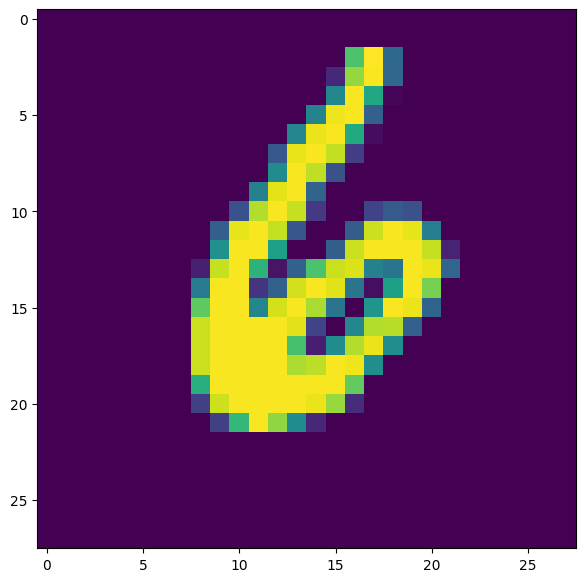

In [9]:
plt.figure(figsize=(7,7))
some_digit=1266
some_digit_image = x.iloc[some_digit].to_numpy()
plt.imshow(np.reshape(some_digit_image, (28,28)))
print(y[some_digit])

<Axes: xlabel='label', ylabel='count'>

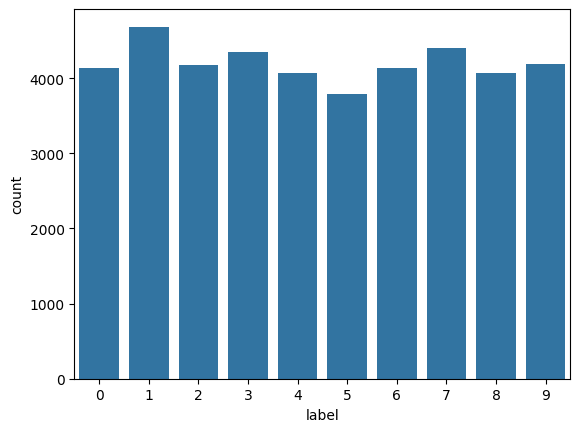

In [10]:
sns.countplot( x='label', data=data_df) 

#### we can conclude that our dataset is balanced

# **Models**

# For ratio 60:40

# Splitting the train data  into train and test 

In [42]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 40)

In [43]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((25200, 784), (25200,), (16800, 784), (16800,))

# KNN

In [44]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_for_test_data = scaler.transform(x_for_test_data)

# k=2

In [45]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [46]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 9, 6, 5])

In [47]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9167857142857143


In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1617
           1       0.93      1.00      0.96      1871
           2       0.91      0.93      0.92      1713
           3       0.87      0.93      0.90      1803
           4       0.89      0.93      0.91      1642
           5       0.88      0.89      0.89      1506
           6       0.97      0.94      0.96      1612
           7       0.90      0.92      0.91      1752
           8       0.97      0.80      0.88      1588
           9       0.94      0.82      0.87      1696

    accuracy                           0.92     16800
   macro avg       0.92      0.92      0.92     16800
weighted avg       0.92      0.92      0.92     16800



In [49]:
print(confusion_matrix(y_test, y_pred))

[[1596    0    3    3    2    5    7    0    0    1]
 [   1 1863    3    0    0    1    0    0    2    1]
 [  27   28 1596   22    7    2    9   12    7    3]
 [   8   11   56 1679    2   22    1    9   11    4]
 [   2   35   20    3 1535    3    4   12    2   26]
 [  13    5    6  100    9 1340   19    7    5    2]
 [  42    4   16    1    6   24 1518    0    1    0]
 [   3   29   19   17   31    1    0 1616    1   35]
 [  18   25   32   71   29  105    6   11 1275   16]
 [  10   12    9   25   95   13    0  137   11 1384]]


In [50]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([2, 0, 9, ..., 3, 9, 2])

# k=4

In [51]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [52]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 9, 6, 5])

In [53]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9288095238095239


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1617
           1       0.93      0.99      0.96      1871
           2       0.94      0.93      0.93      1713
           3       0.90      0.93      0.92      1803
           4       0.92      0.93      0.93      1642
           5       0.91      0.90      0.90      1506
           6       0.96      0.96      0.96      1612
           7       0.92      0.92      0.92      1752
           8       0.96      0.86      0.91      1588
           9       0.91      0.87      0.89      1696

    accuracy                           0.93     16800
   macro avg       0.93      0.93      0.93     16800
weighted avg       0.93      0.93      0.93     16800



In [55]:
print(confusion_matrix(y_test, y_pred))

[[1587    0    2    4    0    6   13    2    1    2]
 [   1 1860    3    0    0    1    3    1    1    1]
 [  18   30 1593   21    9    1   12   15    9    5]
 [   5   10   29 1682    1   27    2   18   19   10]
 [   1   34   14    4 1525    6    4    8    2   44]
 [  14    6    5   77    7 1351   25    6    7    8]
 [  29    4   12    3    5   13 1545    0    1    0]
 [   1   29   11    8   27    0    0 1619    1   56]
 [  14   22   18   41   20   76    4    8 1362   23]
 [  13    6    8   20   59    6    0   92   12 1480]]


In [56]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([2, 0, 9, ..., 3, 9, 2])

# k=5

In [57]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [58]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 9, 6, 5])

In [59]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9298214285714286


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1617
           1       0.93      0.99      0.96      1871
           2       0.94      0.92      0.93      1713
           3       0.91      0.93      0.92      1803
           4       0.93      0.92      0.92      1642
           5       0.91      0.90      0.91      1506
           6       0.96      0.96      0.96      1612
           7       0.93      0.91      0.92      1752
           8       0.96      0.87      0.91      1588
           9       0.89      0.90      0.89      1696

    accuracy                           0.93     16800
   macro avg       0.93      0.93      0.93     16800
weighted avg       0.93      0.93      0.93     16800



In [61]:
print(confusion_matrix(y_test, y_pred))

[[1582    2    3    3    0    8   13    2    2    2]
 [   0 1857    3    0    0    1    4    1    2    3]
 [  16   28 1577   32   11    1   13   16   13    6]
 [   5   10   25 1681    2   33    3   18   18    8]
 [   1   32   13    4 1513    5    3    7    4   60]
 [  11    7    4   65    8 1358   31    5    8    9]
 [  24    3   12    2    6   15 1550    0    0    0]
 [   2   28    8    6   30    0    0 1601    1   76]
 [  13   19   18   38   17   64    5    9 1382   23]
 [  11    7    8   19   45    6    0   68   12 1520]]


In [62]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([2, 0, 9, ..., 3, 9, 2])

# k=6

In [63]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [64]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 9, 6, 5])

In [65]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9272619047619047


In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1617
           1       0.92      0.99      0.96      1871
           2       0.94      0.92      0.93      1713
           3       0.90      0.93      0.92      1803
           4       0.93      0.92      0.92      1642
           5       0.91      0.90      0.91      1506
           6       0.95      0.96      0.96      1612
           7       0.92      0.92      0.92      1752
           8       0.96      0.86      0.91      1588
           9       0.90      0.88      0.89      1696

    accuracy                           0.93     16800
   macro avg       0.93      0.93      0.93     16800
weighted avg       0.93      0.93      0.93     16800



In [67]:
print(confusion_matrix(y_test, y_pred))

[[1584    0    3    3    0    8   14    2    1    2]
 [   0 1858    2    0    0    1    4    2    2    2]
 [  22   29 1576   30    8    1   14   15   11    7]
 [   7    9   29 1676    2   30    3   17   22    8]
 [   1   35   15    4 1513    8    4    5    3   54]
 [  12    9    3   70    8 1360   28    4    6    6]
 [  31    3   12    3    5   14 1542    0    2    0]
 [   1   35    7    7   26    0    0 1609    1   66]
 [  16   22   16   43   20   72    7    8 1362   22]
 [  11    9    7   24   50    4    0   83   10 1498]]


In [68]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([2, 0, 9, ..., 3, 9, 2])

# k=7

In [69]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [70]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 9, 6, 5])

In [71]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9273809523809524


In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1617
           1       0.92      0.99      0.96      1871
           2       0.95      0.91      0.93      1713
           3       0.90      0.93      0.92      1803
           4       0.93      0.92      0.92      1642
           5       0.91      0.90      0.90      1506
           6       0.95      0.96      0.96      1612
           7       0.92      0.91      0.92      1752
           8       0.96      0.86      0.91      1588
           9       0.88      0.89      0.89      1696

    accuracy                           0.93     16800
   macro avg       0.93      0.93      0.93     16800
weighted avg       0.93      0.93      0.93     16800



In [73]:
print(confusion_matrix(y_test, y_pred))

[[1580    2    3    4    1    7   14    2    2    2]
 [   0 1856    2    0    0    1    6    1    2    3]
 [  17   32 1567   35   12    1   14   17   13    5]
 [   6   10   18 1683    2   30    3   19   23    9]
 [   1   31   14    5 1504    8    6    6    3   64]
 [   9   11    3   62    8 1360   31    4    9    9]
 [  20    3   10    2    6   17 1552    0    2    0]
 [   1   33    7    7   24    0    0 1597    1   82]
 [  15   22   17   42   17   71    5    9 1366   24]
 [  12   10    6   23   43    6    0   73    8 1515]]


In [74]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([2, 0, 9, ..., 3, 9, 2])

# k=10

In [75]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [76]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 9, 6, 5])

In [77]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.925


In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1617
           1       0.91      0.99      0.95      1871
           2       0.95      0.91      0.93      1713
           3       0.91      0.93      0.92      1803
           4       0.93      0.91      0.92      1642
           5       0.90      0.90      0.90      1506
           6       0.95      0.96      0.95      1612
           7       0.92      0.91      0.92      1752
           8       0.95      0.86      0.90      1588
           9       0.88      0.89      0.89      1696

    accuracy                           0.93     16800
   macro avg       0.93      0.92      0.92     16800
weighted avg       0.93      0.93      0.92     16800



In [79]:
print(confusion_matrix(y_test, y_pred))

[[1585    1    2    3    2    7   13    3    1    0]
 [   0 1856    2    0    0    2    6    1    1    3]
 [  18   39 1563   31   12    0   15   16   12    7]
 [   3   14   24 1669    2   28    3   21   29   10]
 [   1   36   16    3 1498   12    7    5    1   63]
 [  10   11    4   58    8 1360   34    3    7   11]
 [  28    3    8    3    4   18 1545    0    3    0]
 [   1   36    7    4   24    0    0 1600    1   79]
 [  18   26   14   40   18   72    8    9 1360   23]
 [  10   12    7   24   42    5    0   81   11 1504]]


In [80]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([2, 0, 9, ..., 3, 9, 2])

# For ratio 70:30

# Splitting the train data  into train and test 

In [81]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 40)

In [82]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((29400, 784), (29400,), (12600, 784), (12600,))

# KNN

In [ ]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_for_test_data = scaler.transform(x_for_test_data)

# k=2

In [84]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [85]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 2, 4, 7])

In [86]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.921031746031746


In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1236
           1       0.93      0.99      0.96      1370
           2       0.91      0.94      0.92      1252
           3       0.88      0.94      0.91      1369
           4       0.90      0.93      0.92      1215
           5       0.88      0.90      0.89      1132
           6       0.97      0.95      0.96      1216
           7       0.90      0.93      0.91      1326
           8       0.97      0.82      0.89      1197
           9       0.94      0.83      0.88      1287

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



In [88]:
print(confusion_matrix(y_test, y_pred))

[[1217    0    2    4    1    4    7    0    0    1]
 [   0 1363    3    0    0    1    1    1    1    0]
 [  15   20 1171   18    6    2    5    8    5    2]
 [   4    6   37 1283    1   18    1    8    8    3]
 [   1   21   17    4 1132    3    3   10    2   22]
 [   7    4    3   72    6 1016   12    6    3    3]
 [  31    2   11    1    5   15 1151    0    0    0]
 [   3   21   13   10   19    1    0 1229    1   29]
 [  12   14   18   51   19   83    4    6  980   10]
 [   9    7    7   18   66    9    0   99    9 1063]]


In [89]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([1, 1, 1, ..., 1, 1, 1])

# k=4

In [90]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [91]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 2, 4, 7])

In [92]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9315079365079365


In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1236
           1       0.94      0.99      0.97      1370
           2       0.94      0.93      0.93      1252
           3       0.91      0.93      0.92      1369
           4       0.92      0.93      0.93      1215
           5       0.91      0.91      0.91      1132
           6       0.96      0.96      0.96      1216
           7       0.92      0.93      0.92      1326
           8       0.96      0.87      0.91      1197
           9       0.91      0.88      0.89      1287

    accuracy                           0.93     12600
   macro avg       0.93      0.93      0.93     12600
weighted avg       0.93      0.93      0.93     12600



In [94]:
print(confusion_matrix(y_test, y_pred))

[[1214    0    2    1    0    5   10    2    0    2]
 [   0 1361    3    0    0    1    2    1    1    1]
 [  10   17 1165   18    5    1    8   13    8    7]
 [   2    7   23 1280    0   17    2   16   16    6]
 [   0   21   14    4 1128    3    3    7    0   35]
 [   7    3    2   52    7 1026   19    5    5    6]
 [  25    3    7    3    3    8 1165    0    2    0]
 [   1   19    9    6   17    0    0 1229    1   44]
 [   8   10   13   30   16   60    4    4 1037   15]
 [   9    5    6   14   44    4    0   64    9 1132]]


In [95]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([1, 1, 1, ..., 1, 1, 1])

# k=5

In [96]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [97]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 2, 4, 7])

In [98]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.932063492063492


In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1236
           1       0.94      0.99      0.97      1370
           2       0.94      0.93      0.93      1252
           3       0.92      0.93      0.93      1369
           4       0.94      0.92      0.93      1215
           5       0.91      0.91      0.91      1132
           6       0.96      0.96      0.96      1216
           7       0.92      0.91      0.92      1326
           8       0.96      0.88      0.92      1197
           9       0.89      0.90      0.89      1287

    accuracy                           0.93     12600
   macro avg       0.93      0.93      0.93     12600
weighted avg       0.93      0.93      0.93     12600



In [100]:
print(confusion_matrix(y_test, y_pred))

[[1207    0    3    3    0    6   12    2    1    2]
 [   0 1359    3    0    0    1    2    1    2    2]
 [   9   18 1162   21    5    0    9   12    9    7]
 [   2    6   19 1280    0   21    2   17   16    6]
 [   0   20   14    3 1122    2    2    6    2   44]
 [   8    6    2   44    6 1027   22    4    6    7]
 [  19    3    6    2    5   10 1171    0    0    0]
 [   1   20    9    5   17    0    0 1213    1   60]
 [   6    9   12   24   15   54    4    5 1051   17]
 [   9    4    6   15   30    6    0   55   10 1152]]


In [101]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([1, 1, 1, ..., 1, 1, 1])

# k=6

In [102]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [103]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 2, 4, 7])

In [104]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9301587301587302


In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1236
           1       0.93      0.99      0.96      1370
           2       0.94      0.92      0.93      1252
           3       0.91      0.93      0.92      1369
           4       0.93      0.92      0.93      1215
           5       0.91      0.91      0.91      1132
           6       0.96      0.96      0.96      1216
           7       0.92      0.92      0.92      1326
           8       0.96      0.87      0.91      1197
           9       0.90      0.88      0.89      1287

    accuracy                           0.93     12600
   macro avg       0.93      0.93      0.93     12600
weighted avg       0.93      0.93      0.93     12600



In [106]:
print(confusion_matrix(y_test, y_pred))

[[1206    0    3    2    0    8   13    2    0    2]
 [   0 1361    2    0    1    1    2    1    1    1]
 [  10   20 1157   23    5    1   10   13    8    5]
 [   3    5   20 1280    0   22    2   17   15    5]
 [   0   21   14    3 1123    5    2    6    2   39]
 [   8    5    2   47    6 1031   18    4    5    6]
 [  22    3    8    3    4   10 1165    0    1    0]
 [   1   23    8    4   15    0    0 1220    1   54]
 [   9   11   11   27   16   56    4    4 1042   17]
 [  11    7    6   17   40    3    0   61    7 1135]]


In [107]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([1, 1, 1, ..., 1, 1, 1])

# k=7

In [108]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [109]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 2, 4, 7])

In [110]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9288888888888889


In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1236
           1       0.93      0.99      0.96      1370
           2       0.95      0.92      0.93      1252
           3       0.91      0.93      0.92      1369
           4       0.94      0.92      0.93      1215
           5       0.90      0.91      0.91      1132
           6       0.95      0.96      0.96      1216
           7       0.92      0.91      0.92      1326
           8       0.96      0.87      0.91      1197
           9       0.89      0.90      0.89      1287

    accuracy                           0.93     12600
   macro avg       0.93      0.93      0.93     12600
weighted avg       0.93      0.93      0.93     12600



In [112]:
print(confusion_matrix(y_test, y_pred))

[[1206    0    3    2    0    6   13    2    2    2]
 [   0 1357    2    0    1    2    4    1    2    1]
 [  10   21 1148   29    4    1    9   14   10    6]
 [   4    8   15 1276    1   24    2   17   17    5]
 [   0   18   13    4 1114    6    3    7    2   48]
 [   7    8    2   42    5 1029   22    4    4    9]
 [  19    3    7    2    4    9 1170    0    2    0]
 [   2   23    6    4   17    0    0 1212    1   61]
 [   8   10   12   28   14   61    4    6 1037   17]
 [  11    6    5   17   28    4    0   54    7 1155]]


In [113]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([1, 1, 1, ..., 1, 1, 1])

# k=10

In [114]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [115]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 2, 4, 7])

In [116]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9280952380952381


In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1236
           1       0.92      0.99      0.96      1370
           2       0.95      0.92      0.93      1252
           3       0.91      0.93      0.92      1369
           4       0.94      0.92      0.93      1215
           5       0.91      0.90      0.90      1132
           6       0.95      0.96      0.95      1216
           7       0.92      0.92      0.92      1326
           8       0.96      0.87      0.91      1197
           9       0.88      0.89      0.89      1287

    accuracy                           0.93     12600
   macro avg       0.93      0.93      0.93     12600
weighted avg       0.93      0.93      0.93     12600



In [118]:
print(confusion_matrix(y_test, y_pred))

[[1209    0    2    2    1    6   13    2    0    1]
 [   0 1358    2    0    1    2    4    1    1    1]
 [   7   23 1152   26    7    0   10   12    9    6]
 [   2   10   18 1275    1   17    2   18   19    7]
 [   0   21   11    3 1113    7    5    7    1   47]
 [   7    8    2   48    5 1022   23    3    5    9]
 [  23    2    5    3    4   13 1164    0    2    0]
 [   1   25    9    3   13    0    0 1215    1   59]
 [   9   14   11   24   15   56    5    4 1039   20]
 [   9    8    5   16   29    5    0   61    7 1147]]


In [119]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([1, 1, 1, ..., 1, 1, 1])

# For ratio 75:25

# Splitting the train data  into train and test 

In [11]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 40)

In [12]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((31500, 784), (31500,), (10500, 784), (10500,))

# KNN

In [13]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_for_test_data = scaler.transform(x_for_test_data)

# k=2

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [15]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 6, 2, 2])

In [16]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9214285714285714


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1022
           1       0.93      0.99      0.96      1130
           2       0.92      0.93      0.92      1053
           3       0.89      0.94      0.91      1128
           4       0.90      0.93      0.92      1014
           5       0.88      0.89      0.89       934
           6       0.97      0.95      0.96      1008
           7       0.90      0.94      0.92      1103
           8       0.97      0.83      0.90      1013
           9       0.94      0.82      0.88      1095

    accuracy                           0.92     10500
   macro avg       0.92      0.92      0.92     10500
weighted avg       0.92      0.92      0.92     10500



In [18]:
print(confusion_matrix(y_test, y_pred))

[[1006    0    2    4    1    3    5    0    0    1]
 [   0 1124    2    0    0    1    1    1    1    0]
 [  14   20  983   13    7    0    6    4    5    1]
 [   3    5   31 1056    1   17    1    5    6    3]
 [   1   20   15    2  941    2    3    8    2   20]
 [   4    3    2   60    6  835   14    6    2    2]
 [  26    2    8    1    3   12  956    0    0    0]
 [   3   18    7    6   10    1    0 1034    1   23]
 [  12   12   17   35   14   67    3    5  841    7]
 [   7    6    7   14   57   10    0   87    8  899]]


In [19]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([2, 0, 9, ..., 3, 9, 2])

# k=4

In [20]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [21]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 6, 2, 2])

In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.931047619047619


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1022
           1       0.94      0.99      0.97      1130
           2       0.94      0.93      0.94      1053
           3       0.91      0.93      0.92      1128
           4       0.93      0.93      0.93      1014
           5       0.91      0.90      0.90       934
           6       0.95      0.96      0.96      1008
           7       0.91      0.94      0.92      1103
           8       0.96      0.87      0.91      1013
           9       0.91      0.88      0.89      1095

    accuracy                           0.93     10500
   macro avg       0.93      0.93      0.93     10500
weighted avg       0.93      0.93      0.93     10500



In [24]:
print(confusion_matrix(y_test, y_pred))

[[1003    0    2    1    0    4    8    2    0    2]
 [   0 1123    2    0    0    1    2    0    1    1]
 [  10   14  981   16    5    1    7    8    7    4]
 [   2    6   18 1051    0   17    2   13   13    6]
 [   0   20   11    2  938    3    3    6    1   30]
 [   4    3    1   43    6  840   22    5    4    6]
 [  20    3    3    3    2    8  968    0    1    0]
 [   1   15    6    2   10    0    0 1032    1   36]
 [   8    7   13   22   17   48    3    4  879   12]
 [   6    4    6   11   33    3    0   61   10  961]]


In [25]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([2, 0, 9, ..., 3, 9, 2])

# k=5

In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 6, 2, 2])

In [28]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9318095238095238


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1022
           1       0.94      0.99      0.96      1130
           2       0.95      0.93      0.94      1053
           3       0.92      0.93      0.92      1128
           4       0.94      0.92      0.93      1014
           5       0.91      0.90      0.90       934
           6       0.95      0.96      0.96      1008
           7       0.92      0.93      0.92      1103
           8       0.96      0.88      0.92      1013
           9       0.90      0.89      0.89      1095

    accuracy                           0.93     10500
   macro avg       0.93      0.93      0.93     10500
weighted avg       0.93      0.93      0.93     10500



In [30]:
print(confusion_matrix(y_test, y_pred))

[[ 998    0    3    2    0    5    9    2    1    2]
 [   0 1123    2    0    0    1    2    1    1    0]
 [   8   15  978   17    5    1    7    9    8    5]
 [   2    7   14 1047    0   19    2   18   13    6]
 [   0   19   12    2  931    2    3    7    2   36]
 [   5    5    1   38    5  843   23    4    3    7]
 [  17    3    3    2    4    7  972    0    0    0]
 [   1   15    4    3   10    0    0 1024    1   45]
 [   6    7   11   19   13   47    4    4  889   13]
 [   8    4    6   13   23    4    0   50    8  979]]


In [31]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([2, 0, 9, ..., 3, 9, 2])

# k=6

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [33]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 6, 2, 2])

In [34]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9286666666666666


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1022
           1       0.93      0.99      0.96      1130
           2       0.94      0.93      0.94      1053
           3       0.91      0.93      0.92      1128
           4       0.93      0.92      0.92      1014
           5       0.90      0.91      0.90       934
           6       0.95      0.96      0.96      1008
           7       0.91      0.93      0.92      1103
           8       0.96      0.87      0.91      1013
           9       0.90      0.87      0.89      1095

    accuracy                           0.93     10500
   macro avg       0.93      0.93      0.93     10500
weighted avg       0.93      0.93      0.93     10500



In [36]:
print(confusion_matrix(y_test, y_pred))

[[ 998    0    3    1    0    6   10    2    0    2]
 [   0 1123    2    0    0    1    2    1    1    0]
 [   7   18  976   19    4    1    9    8    7    4]
 [   3    4   15 1050    0   20    2   17   12    5]
 [   0   19   12    2  931    5    2    6    3   34]
 [   4    4    1   38    5  846   21    4    5    6]
 [  19    3    4    3    3    8  967    0    1    0]
 [   1   19    4    3   12    0    0 1023    1   40]
 [   9    9   10   21   14   49    4    3  879   15]
 [   9    6    6   13   33    4    0   59    7  958]]


In [37]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([2, 0, 9, ..., 3, 9, 2])

# k=7

In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [39]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 6, 2, 2])

In [40]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9282857142857143


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1022
           1       0.93      0.99      0.96      1130
           2       0.95      0.92      0.93      1053
           3       0.91      0.93      0.92      1128
           4       0.94      0.91      0.92      1014
           5       0.90      0.91      0.90       934
           6       0.95      0.96      0.95      1008
           7       0.92      0.92      0.92      1103
           8       0.96      0.87      0.91      1013
           9       0.89      0.89      0.89      1095

    accuracy                           0.93     10500
   macro avg       0.93      0.93      0.93     10500
weighted avg       0.93      0.93      0.93     10500



In [42]:
print(confusion_matrix(y_test, y_pred))

[[ 996    0    3    1    0    6   11    2    1    2]
 [   0 1120    2    0    1    2    3    0    1    1]
 [  10   18  970   22    4    0    9    7    9    4]
 [   4    5   13 1051    0   19    2   18   11    5]
 [   0   17   12    2  920    5    3    9    4   42]
 [   4    5    1   35    6  846   22    4    4    7]
 [  17    3    3    2    3    7  972    0    1    0]
 [   1   18    4    3   13    0    0 1017    1   46]
 [   8    9   10   19   13   53    6    4  877   14]
 [   9    6    6   14   23    3    0   50    6  978]]


In [43]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([2, 0, 9, ..., 3, 9, 2])

# k=10

In [44]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [45]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 6, 2, 2])

In [46]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9261904761904762


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1022
           1       0.92      0.99      0.95      1130
           2       0.95      0.92      0.93      1053
           3       0.91      0.93      0.92      1128
           4       0.93      0.91      0.92      1014
           5       0.91      0.90      0.90       934
           6       0.95      0.96      0.95      1008
           7       0.92      0.92      0.92      1103
           8       0.96      0.86      0.91      1013
           9       0.89      0.88      0.89      1095

    accuracy                           0.93     10500
   macro avg       0.93      0.93      0.93     10500
weighted avg       0.93      0.93      0.93     10500



In [48]:
print(confusion_matrix(y_test, y_pred))

[[ 999    1    2    1    0    5   10    2    1    1]
 [   0 1120    2    0    1    2    3    0    1    1]
 [   7   21  968   23    6    0    9    7    9    3]
 [   2    9   16 1050    1   13    2   16   13    6]
 [   0   19   10    3  924    7    2    7    2   40]
 [   5    7    1   39    5  840   23    3    3    8]
 [  16    2    3    3    3   10  970    0    1    0]
 [   1   21    3    3   12    0    0 1016    1   46]
 [  11   12   10   22   14   48    5    4  871   16]
 [   8    8    5   14   27    3    0   55    8  967]]


In [49]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([2, 0, 9, ..., 3, 9, 2])

# For ratio 80:20

# Splitting the train data  into train and test 

In [120]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 40)

In [121]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((33600, 784), (33600,), (8400, 784), (8400,))

# KNN

In [ ]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_for_test_data = scaler.transform(x_for_test_data)

# k=2

In [123]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [124]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 5, 6, 3])

In [125]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9228571428571428


In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       821
           1       0.93      0.99      0.96       899
           2       0.92      0.94      0.93       858
           3       0.90      0.94      0.91       913
           4       0.90      0.93      0.91       791
           5       0.88      0.90      0.89       762
           6       0.97      0.95      0.96       808
           7       0.91      0.94      0.92       880
           8       0.97      0.84      0.90       789
           9       0.94      0.82      0.88       879

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400



In [127]:
print(confusion_matrix(y_test, y_pred))

[[809   0   3   0   0   4   4   0   0   1]
 [  0 894   1   0   0   2   0   1   1   0]
 [ 12  14 803   8   7   0   5   4   4   1]
 [  3   5  25 854   0  14   1   4   5   2]
 [  1  16   9   2 732   2   2   7   1  19]
 [  5   3   1  45   4 684  12   5   2   1]
 [ 21   1   8   1   3   9 765   0   0   0]
 [  1  14   5   4   9   1   0 826   1  19]
 [  9   8  12  26  11  51   2   4 661   5]
 [  6   6   7  14  48   7   0  60   7 724]]


In [128]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([1, 1, 1, ..., 1, 1, 1])

# k=4

In [129]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [130]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 5, 6, 3])

In [131]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9326190476190476


In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       821
           1       0.94      0.99      0.97       899
           2       0.94      0.93      0.94       858
           3       0.91      0.94      0.93       913
           4       0.92      0.92      0.92       791
           5       0.91      0.90      0.90       762
           6       0.96      0.96      0.96       808
           7       0.92      0.94      0.93       880
           8       0.95      0.87      0.91       789
           9       0.92      0.88      0.90       879

    accuracy                           0.93      8400
   macro avg       0.93      0.93      0.93      8400
weighted avg       0.93      0.93      0.93      8400



In [133]:
print(confusion_matrix(y_test, y_pred))

[[808   0   2   0   0   4   6   0   0   1]
 [  0 894   1   0   0   1   1   0   1   1]
 [  9  10 800  12   6   0   6   5   8   2]
 [  2   6  13 855   0  13   2   8  10   4]
 [  0  15   8   2 731   2   3   7   1  22]
 [  4   3   1  36   4 685  16   4   5   4]
 [ 17   1   4   2   2   7 774   0   1   0]
 [  0  11   3   2   8   0   0 825   1  30]
 [  6   5  11  16  11  39   2   3 689   7]
 [  6   3   6  10  30   3   0  42   6 773]]


In [134]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([1, 1, 1, ..., 1, 1, 1])

# k=5

In [135]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [136]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 5, 6, 3])

In [137]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.935


In [138]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       821
           1       0.94      0.99      0.97       899
           2       0.95      0.93      0.94       858
           3       0.92      0.93      0.93       913
           4       0.94      0.92      0.93       791
           5       0.92      0.91      0.91       762
           6       0.95      0.96      0.96       808
           7       0.92      0.93      0.93       880
           8       0.96      0.89      0.92       789
           9       0.91      0.90      0.90       879

    accuracy                           0.94      8400
   macro avg       0.94      0.93      0.93      8400
weighted avg       0.94      0.94      0.93      8400



In [139]:
print(confusion_matrix(y_test, y_pred))

[[808   0   2   0   0   4   6   0   0   1]
 [  0 894   1   0   0   1   1   1   1   0]
 [  6  11 798  13   6   0   7   6   8   3]
 [  2   7  11 851   0  14   2  13  10   3]
 [  0  15   8   2 725   2   3   8   1  27]
 [  5   4   1  29   4 692  17   3   3   4]
 [ 15   1   3   2   3   5 779   0   0   0]
 [  0  11   2   3  10   0   0 819   1  34]
 [  5   6  10  11   8  34   3   3 701   8]
 [  8   3   6  12  19   3   0  35   6 787]]


In [140]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([1, 1, 1, ..., 1, 1, 1])

# k=6

In [141]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [142]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 5, 6, 3])

In [143]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9314285714285714


In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       821
           1       0.93      0.99      0.96       899
           2       0.95      0.93      0.94       858
           3       0.92      0.93      0.92       913
           4       0.93      0.92      0.92       791
           5       0.91      0.91      0.91       762
           6       0.95      0.96      0.95       808
           7       0.92      0.93      0.92       880
           8       0.96      0.88      0.92       789
           9       0.91      0.88      0.89       879

    accuracy                           0.93      8400
   macro avg       0.93      0.93      0.93      8400
weighted avg       0.93      0.93      0.93      8400



In [145]:
print(confusion_matrix(y_test, y_pred))

[[806   0   4   0   0   4   6   0   0   1]
 [  0 894   1   0   0   1   1   1   1   0]
 [  5  14 797  14   4   0   9   5   7   3]
 [  2   4  12 850   0  15   2  15  10   3]
 [  0  16   7   2 727   3   2   6   1  27]
 [  5   3   1  30   3 691  17   4   4   4]
 [ 18   1   4   2   3   5 774   0   1   0]
 [  0  14   3   3  11   0   0 819   1  29]
 [  6   7   7  13  11  38   2   2 692  11]
 [  9   5   6  11  25   4   0  40   5 774]]


In [146]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([1, 1, 1, ..., 1, 1, 1])

# k=7

In [147]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [148]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 5, 6, 3])

In [149]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9314285714285714


In [150]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       821
           1       0.94      0.99      0.96       899
           2       0.95      0.93      0.94       858
           3       0.92      0.93      0.93       913
           4       0.93      0.91      0.92       791
           5       0.90      0.91      0.91       762
           6       0.95      0.96      0.96       808
           7       0.92      0.93      0.92       880
           8       0.95      0.87      0.91       789
           9       0.90      0.89      0.90       879

    accuracy                           0.93      8400
   macro avg       0.93      0.93      0.93      8400
weighted avg       0.93      0.93      0.93      8400



In [151]:
print(confusion_matrix(y_test, y_pred))

[[807   0   3   0   0   4   6   0   0   1]
 [  0 892   1   0   1   1   2   0   1   1]
 [  8  12 794  14   5   0   9   5   9   2]
 [  2   5  11 847   1  17   2  14  11   3]
 [  0  14   7   2 722   3   1   8   3  31]
 [  4   4   1  27   3 693  18   4   4   4]
 [ 15   1   3   2   3   4 779   0   1   0]
 [  0  13   1   3  11   0   0 814   1  37]
 [  6   6   9  12   9  41   4   3 690   9]
 [  8   5   6  11  20   4   0  33   6 786]]


In [152]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([1, 1, 1, ..., 1, 1, 1])

# k=10

In [153]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [154]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 5, 6, 3])

In [155]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9263095238095238


In [156]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       821
           1       0.92      0.99      0.95       899
           2       0.95      0.92      0.93       858
           3       0.91      0.92      0.92       913
           4       0.92      0.91      0.92       791
           5       0.90      0.90      0.90       762
           6       0.95      0.96      0.95       808
           7       0.91      0.92      0.92       880
           8       0.95      0.87      0.91       789
           9       0.89      0.88      0.89       879

    accuracy                           0.93      8400
   macro avg       0.93      0.93      0.93      8400
weighted avg       0.93      0.93      0.93      8400



In [157]:
print(confusion_matrix(y_test, y_pred))

[[806   1   3   0   0   3   7   0   0   1]
 [  0 891   1   0   1   2   2   0   1   1]
 [  6  16 788  16   9   0   9   5   7   2]
 [  2   9  11 844   1  13   2  15  13   3]
 [  0  14   5   2 723   5   1   8   2  31]
 [  4   4   1  34   3 687  19   3   2   5]
 [ 15   1   4   1   3   7 776   0   1   0]
 [  0  17   2   3  10   0   0 809   1  38]
 [  7   9   8  14   9  40   3   3 685  11]
 [  8   6   5  12  23   4   0  43   6 772]]


In [158]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([1, 1, 1, ..., 1, 1, 1])

# For ratio 90:10

# Splitting the train data  into train and test 

In [159]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 40)

In [160]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((37800, 784), (37800,), (4200, 784), (4200,))

# KNN

In [ ]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_for_test_data = scaler.transform(x_for_test_data)

# k=2

In [162]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [163]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 7, 8, 2])

In [164]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9238095238095239


In [165]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       389
           1       0.94      1.00      0.97       457
           2       0.94      0.94      0.94       441
           3       0.90      0.93      0.91       434
           4       0.88      0.94      0.91       407
           5       0.89      0.91      0.90       380
           6       0.97      0.94      0.96       428
           7       0.90      0.94      0.92       421
           8       0.97      0.84      0.90       409
           9       0.94      0.82      0.87       434

    accuracy                           0.92      4200
   macro avg       0.92      0.92      0.92      4200
weighted avg       0.93      0.92      0.92      4200



In [166]:
print(confusion_matrix(y_test, y_pred))

[[383   0   0   0   0   2   2   1   0   1]
 [  0 456   0   0   0   0   0   1   0   0]
 [  5   7 415   2   5   0   3   2   2   0]
 [  2   3  14 402   0   7   0   2   3   1]
 [  0   8   3   0 381   1   1   2   0  11]
 [  2   2   1  16   3 344   7   3   1   1]
 [ 14   0   3   1   2   4 404   0   0   0]
 [  0   6   3   2   6   1   0 396   0   7]
 [  8   2   2  15   7  24   1   3 344   3]
 [  2   3   2  10  27   3   0  28   4 355]]


In [167]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([1, 1, 1, ..., 1, 1, 1])

# k=4

In [168]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [169]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 7, 8, 2])

In [170]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9361904761904762


In [171]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       389
           1       0.95      1.00      0.98       457
           2       0.96      0.94      0.95       441
           3       0.92      0.94      0.93       434
           4       0.92      0.93      0.92       407
           5       0.92      0.91      0.92       380
           6       0.96      0.95      0.96       428
           7       0.92      0.94      0.93       421
           8       0.97      0.90      0.93       409
           9       0.91      0.87      0.89       434

    accuracy                           0.94      4200
   macro avg       0.94      0.94      0.94      4200
weighted avg       0.94      0.94      0.94      4200



In [172]:
print(confusion_matrix(y_test, y_pred))

[[382   0   0   0   0   2   3   0   0   2]
 [  0 456   0   0   0   0   1   0   0   0]
 [  3   4 415   5   3   0   4   2   4   1]
 [  1   3   7 406   0   6   0   3   5   3]
 [  0   7   2   0 377   1   1   4   0  15]
 [  2   0   1  14   2 347   8   3   1   2]
 [ 11   0   2   2   1   4 408   0   0   0]
 [  0   4   1   1   7   0   0 397   0  11]
 [  4   2   2   6   6  15   1   2 367   4]
 [  2   2   2   9  15   2   0  22   3 377]]


In [173]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([1, 1, 1, ..., 1, 1, 1])

# k=5

In [174]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [175]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 7, 8, 2])

In [176]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9378571428571428


In [177]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       389
           1       0.94      1.00      0.97       457
           2       0.96      0.93      0.94       441
           3       0.92      0.93      0.92       434
           4       0.93      0.92      0.93       407
           5       0.92      0.92      0.92       380
           6       0.96      0.96      0.96       428
           7       0.92      0.94      0.93       421
           8       0.97      0.90      0.93       409
           9       0.92      0.89      0.90       434

    accuracy                           0.94      4200
   macro avg       0.94      0.94      0.94      4200
weighted avg       0.94      0.94      0.94      4200



In [178]:
print(confusion_matrix(y_test, y_pred))

[[383   0   0   0   0   2   3   0   0   1]
 [  0 456   0   0   0   0   1   0   0   0]
 [  2   7 410   8   4   0   5   3   1   1]
 [  1   3   5 404   0   7   0   6   6   2]
 [  0   7   3   0 376   1   1   5   0  14]
 [  3   1   1  10   2 349   8   2   1   3]
 [  9   0   2   2   1   3 411   0   0   0]
 [  0   4   2   2   7   0   0 394   0  12]
 [  5   3   3   5   4  14   1   3 368   3]
 [  2   2   2   9  10   2   0  15   4 388]]


In [179]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([1, 1, 1, ..., 1, 1, 1])

# k=6

In [180]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [181]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 7, 8, 2])

In [182]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.935952380952381


In [183]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       389
           1       0.94      1.00      0.97       457
           2       0.96      0.93      0.95       441
           3       0.92      0.94      0.93       434
           4       0.93      0.93      0.93       407
           5       0.92      0.91      0.92       380
           6       0.95      0.96      0.95       428
           7       0.91      0.94      0.92       421
           8       0.97      0.89      0.93       409
           9       0.92      0.88      0.90       434

    accuracy                           0.94      4200
   macro avg       0.94      0.94      0.94      4200
weighted avg       0.94      0.94      0.94      4200



In [184]:
print(confusion_matrix(y_test, y_pred))

[[383   0   0   0   0   2   3   0   0   1]
 [  0 456   0   0   0   0   1   0   0   0]
 [  2   6 412   7   3   0   5   3   2   1]
 [  1   3   5 406   0   5   0   7   5   2]
 [  0   7   3   0 378   1   1   5   0  12]
 [  3   1   1  13   2 345   9   3   1   2]
 [ 12   0   1   2   1   3 409   0   0   0]
 [  0   6   2   2   6   0   0 395   0  10]
 [  7   2   2   5   4  16   2   3 364   4]
 [  2   2   2   7  12   2   0  20   4 383]]


In [185]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([1, 1, 1, ..., 1, 1, 1])

# k=7

In [186]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [187]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 7, 8, 2])

In [188]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9354761904761905


In [189]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       389
           1       0.94      1.00      0.97       457
           2       0.96      0.92      0.94       441
           3       0.92      0.93      0.93       434
           4       0.94      0.92      0.93       407
           5       0.91      0.91      0.91       380
           6       0.95      0.96      0.96       428
           7       0.91      0.94      0.93       421
           8       0.97      0.89      0.92       409
           9       0.91      0.89      0.90       434

    accuracy                           0.94      4200
   macro avg       0.94      0.94      0.93      4200
weighted avg       0.94      0.94      0.94      4200



In [190]:
print(confusion_matrix(y_test, y_pred))

[[383   0   0   0   0   2   3   0   0   1]
 [  0 455   0   0   0   0   1   0   0   1]
 [  4   7 407   8   4   0   5   4   2   0]
 [  1   3   5 405   0   5   0   8   5   2]
 [  0   6   3   0 375   2   1   6   1  13]
 [  2   1   1  12   2 347   9   2   1   3]
 [ 10   0   2   1   1   3 411   0   0   0]
 [  0   5   0   2   7   0   0 397   0  10]
 [  6   2   2   5   4  18   2   2 362   6]
 [  2   3   2   8   8   3   0  18   3 387]]


In [191]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([1, 1, 1, ..., 1, 1, 1])

# k=10

In [192]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [193]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 7, 8, 2])

In [194]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.929047619047619


In [195]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       389
           1       0.93      0.99      0.96       457
           2       0.97      0.92      0.94       441
           3       0.91      0.93      0.92       434
           4       0.92      0.92      0.92       407
           5       0.91      0.91      0.91       380
           6       0.94      0.96      0.95       428
           7       0.91      0.92      0.92       421
           8       0.96      0.87      0.92       409
           9       0.90      0.88      0.89       434

    accuracy                           0.93      4200
   macro avg       0.93      0.93      0.93      4200
weighted avg       0.93      0.93      0.93      4200



In [196]:
print(confusion_matrix(y_test, y_pred))

[[382   0   0   0   0   2   4   0   0   1]
 [  0 454   0   0   0   1   1   0   0   1]
 [  3   8 404  10   5   0   6   3   2   0]
 [  1   5   5 402   0   7   0   7   4   3]
 [  0   7   2   0 375   3   1   4   1  14]
 [  2   1   1  14   2 346  10   3   0   1]
 [ 11   0   2   1   1   2 410   0   1   0]
 [  0   7   1   2   8   0   0 388   0  15]
 [  6   3   1   6   5  18   2   2 357   9]
 [  2   3   1   7  11   2   0  19   5 384]]


In [197]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([1, 1, 1, ..., 1, 1, 1])

# For ratio 95:5

# Splitting the train data  into train and test 

In [12]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 40)

In [13]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((39900, 784), (39900,), (2100, 784), (2100,))

# KNN

In [14]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_for_test_data = scaler.transform(x_for_test_data)

# k=2

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [16]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 8, 2, 0])

In [17]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9214285714285714


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       210
           1       0.94      1.00      0.97       215
           2       0.93      0.95      0.94       211
           3       0.88      0.93      0.90       215
           4       0.88      0.95      0.91       190
           5       0.88      0.89      0.89       201
           6       0.94      0.94      0.94       212
           7       0.92      0.93      0.92       222
           8       0.97      0.84      0.90       223
           9       0.95      0.79      0.86       201

    accuracy                           0.92      2100
   macro avg       0.92      0.92      0.92      2100
weighted avg       0.92      0.92      0.92      2100



In [19]:
print(confusion_matrix(y_test, y_pred))

[[208   0   0   0   0   0   1   0   0   1]
 [  0 215   0   0   0   0   0   0   0   0]
 [  3   1 200   0   2   0   3   1   1   0]
 [  1   2   8 199   0   4   0   0   1   0]
 [  0   2   0   0 181   1   1   1   0   4]
 [  1   1   1   8   2 179   6   2   1   0]
 [  7   0   2   1   1   2 199   0   0   0]
 [  0   4   2   2   4   1   0 207   0   2]
 [  3   1   2  10   3  13   1   1 188   1]
 [  1   2   0   7  13   3   0  14   2 159]]


In [20]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([2, 0, 9, ..., 3, 9, 2])

# k=4

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [22]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 8, 2, 0])

In [23]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9323809523809524


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       210
           1       0.95      1.00      0.97       215
           2       0.96      0.95      0.95       211
           3       0.91      0.93      0.92       215
           4       0.91      0.95      0.93       190
           5       0.91      0.89      0.90       201
           6       0.94      0.95      0.95       212
           7       0.93      0.92      0.93       222
           8       0.98      0.89      0.93       223
           9       0.91      0.86      0.88       201

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



In [25]:
print(confusion_matrix(y_test, y_pred))

[[207   0   0   0   0   0   2   0   0   1]
 [  0 214   0   0   0   0   1   0   0   0]
 [  2   2 201   0   1   0   2   1   1   1]
 [  1   2   5 199   0   4   0   1   1   2]
 [  0   2   0   0 180   1   1   1   0   5]
 [  1   1   1   8   1 179   6   2   1   1]
 [  6   0   0   2   1   1 202   0   0   0]
 [  0   3   1   1   6   0   0 205   0   6]
 [  3   0   2   4   2  11   0   1 198   2]
 [  1   2   0   5   7   1   0  10   2 173]]


In [26]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([2, 0, 9, ..., 3, 9, 2])

# k=5

In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [28]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 8, 2, 0])

In [29]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9328571428571428


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       210
           1       0.95      1.00      0.97       215
           2       0.95      0.95      0.95       211
           3       0.91      0.93      0.92       215
           4       0.91      0.94      0.93       190
           5       0.90      0.90      0.90       201
           6       0.94      0.95      0.95       212
           7       0.94      0.91      0.92       222
           8       0.98      0.89      0.93       223
           9       0.89      0.88      0.89       201

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



In [31]:
print(confusion_matrix(y_test, y_pred))

[[207   0   0   0   0   0   2   0   0   1]
 [  0 214   0   0   0   0   1   0   0   0]
 [  1   3 200   2   2   0   2   1   0   0]
 [  1   1   3 201   0   4   0   3   1   1]
 [  0   1   0   0 179   1   1   1   0   7]
 [  2   1   1   5   2 180   6   1   1   2]
 [  6   0   1   2   1   1 201   0   0   0]
 [  0   3   2   2   5   0   0 202   0   8]
 [  2   1   3   3   2  11   0   1 198   2]
 [  1   2   0   5   6   2   0   6   2 177]]


In [32]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([2, 0, 9, ..., 3, 9, 2])

# k=6

In [33]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [34]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 8, 2, 0])

In [35]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9304761904761905


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       210
           1       0.95      1.00      0.97       215
           2       0.96      0.95      0.95       211
           3       0.91      0.93      0.92       215
           4       0.92      0.95      0.94       190
           5       0.89      0.88      0.89       201
           6       0.93      0.95      0.94       212
           7       0.92      0.92      0.92       222
           8       0.98      0.88      0.92       223
           9       0.91      0.87      0.89       201

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



In [37]:
print(confusion_matrix(y_test, y_pred))

[[207   0   0   0   0   0   2   0   0   1]
 [  0 214   0   0   0   0   1   0   0   0]
 [  2   2 200   0   1   0   3   1   1   1]
 [  1   2   3 199   0   4   0   4   1   1]
 [  0   1   0   0 181   1   1   1   0   5]
 [  2   1   1   7   2 177   7   2   1   1]
 [  6   0   0   2   1   1 202   0   0   0]
 [  0   4   2   2   4   0   0 204   0   6]
 [  3   0   2   3   2  13   1   1 196   2]
 [  1   2   0   5   6   2   0   9   2 174]]


In [38]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([2, 0, 9, ..., 3, 9, 2])

# k=7

In [39]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [40]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 8, 2, 0])

In [41]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9314285714285714


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       210
           1       0.94      1.00      0.97       215
           2       0.97      0.93      0.95       211
           3       0.91      0.92      0.91       215
           4       0.91      0.96      0.93       190
           5       0.90      0.89      0.89       201
           6       0.94      0.95      0.94       212
           7       0.92      0.92      0.92       222
           8       0.98      0.88      0.93       223
           9       0.92      0.88      0.90       201

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



In [43]:
print(confusion_matrix(y_test, y_pred))

[[207   0   0   0   0   0   2   0   0   1]
 [  0 214   0   0   0   0   1   0   0   0]
 [  3   3 197   1   2   0   3   2   0   0]
 [  1   2   3 198   0   4   0   5   1   1]
 [  0   0   0   0 182   1   1   1   0   5]
 [  1   1   1   7   2 178   7   1   1   2]
 [  6   0   1   1   1   1 202   0   0   0]
 [  0   4   0   2   6   0   0 205   0   5]
 [  3   1   2   3   3  11   0   1 197   2]
 [  1   2   0   6   5   2   0   7   2 176]]


In [44]:
y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([2, 0, 9, ..., 3, 9, 2])

# k=10

In [45]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [46]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 8, 2, 0])

In [47]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9266666666666666


In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       210
           1       0.93      1.00      0.96       215
           2       0.96      0.94      0.95       211
           3       0.91      0.93      0.92       215
           4       0.90      0.94      0.92       190
           5       0.89      0.88      0.88       201
           6       0.93      0.95      0.94       212
           7       0.92      0.91      0.91       222
           8       0.98      0.87      0.92       223
           9       0.90      0.87      0.88       201

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



In [49]:
print(confusion_matrix(y_test, y_pred))

[[207   0   0   0   0   0   2   0   0   1]
 [  0 214   0   0   0   0   1   0   0   0]
 [  2   3 199   0   2   0   4   1   0   0]
 [  1   2   4 199   0   3   0   4   1   1]
 [  0   1   0   0 179   2   1   1   0   6]
 [  1   1   1   8   2 177   7   2   0   2]
 [  7   0   1   1   1   1 201   0   0   0]
 [  0   5   1   2   7   0   0 201   0   6]
 [  1   1   1   4   2  15   0   1 194   4]
 [  1   2   0   5   5   2   0   8   3 175]]


In [50]:

y_pred_on_test_data = classifier.predict(x_for_test_data)
y_pred_on_test_data

array([2, 0, 9, ..., 3, 9, 2])